# <center> Module 2 - Lesson 4 Part 2: Preprocessing  </center>
<center>by: Nicole Woodland, P. Eng. for RoboGarden Inc. </center>

---

<center> In this notebook, we'll apply preprocessing steps to a numerical dataset </center>

<center><img src = "https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-cover.jpg" width=600 height=100 /></center>

### <font color=green>Iris Data Preprocessing: </font>

1. Encode the label column in the dataset ("Species") using the Label Encoder.
2. Determine if any other encoding is required.
3. Scale the attribute data using the StandardScalar from Scikitlearn.
4. Make a table showing the correlation of all the attributes and the encoded Species column.

This notebook will showcase the remaining, Scaling and Dimensionality Reduction preprocessing steps:
- Cleaning
- Encoding
- **Scaling**
- **Feature (or Dimensionality) Reduction**

### Load the Data into a Dataframe

In [36]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
df = pd.read_csv("..\iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Perform Data Cleaning:

In [7]:
# Data cleaning - the Id column is not needed for machine learning, needs to removed
df = df.drop("Id", axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Perform Label Encoding on the Species column. This is the LABEL column.

In [9]:
# The label column here is the name of teh species, categorical data, so we have to change that!
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Species'] = encoder.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


No other encoding is required. All attribute columns are numerical.

### Scale the Data!

In [12]:
# Scale the attribute data. All Feature comumns can be done at once. 
# If there was no label column, the entire DF could be passed to the function, however, 
# the Label DOES NOT need to be scaled!


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[["SepalLengthCm","SepalWidthCm",
    "PetalLengthCm","PetalWidthCm"]] = scaler.fit_transform(df[["SepalLengthCm",
                                                                "SepalWidthCm",
                                                                "PetalLengthCm",
                                                                "PetalWidthCm"]])
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


### Evaluate for Dimensionality Reduction

Ideally, Reduce Dimensions in a few ways:
- Duplicate columns (See previous cleaning lesson)
- Highly Correlated Columns
- Constant columns
- Exhaustive Feature Selection

#### Reduce highly correlated columns by hand or with a script by considering their correlation to each other and to the Label (in the case of regression modelling). 

In [14]:
df_features = df.drop("Species", axis = 1)
df_features.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


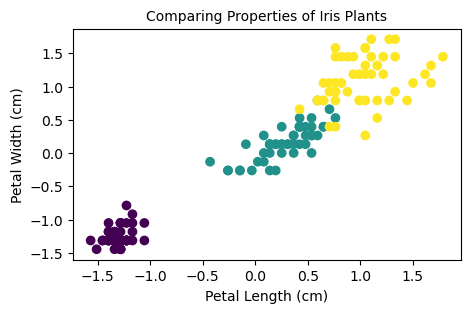

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.scatter(x = df["PetalLengthCm"],y = df["PetalWidthCm"], c = df['Species'])
plt.title("Comparing Properties of Iris Plants", size = 10)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.show()

It is reasonable to drop features that are highly correlated with eachother. This dataset has minimal columns, so it will have limited impact on any training time, but we could consider dropping one of the Petal Length or Petal Width as one almost directly correlates with the other. There are a few ways to accomplish this; by hand or with a script.

### 1 - Drop by Hand based on Correlation Value:
In this process, you can drop one of any pair of columns that are highly correlated after observing which columns are related, often when r > 0.9 to 0.95.

In [17]:
# By hand:
df_features = df_features.drop("PetalWidthCm", axis=1)
df_features.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,-0.900681,1.032057,-1.341272
1,-1.143017,-0.124958,-1.341272
2,-1.385353,0.337848,-1.398138


### 2 - Drop with a Script based on a Correlation Value:

In [38]:
df_features1 = df.drop("Species", axis = 1)
print("Original Data (with Species dropped):"), display(df_features1.corr())
correlation_threshold = 0.95

# Iterate through consecutive pairs of columns
correlated_pairs = np.abs(df_features1.corr()) > correlation_threshold
print("\nCorrelation Table with Filter Applied:"), display(correlated_pairs)

correlated_pairs = np.column_stack(np.where(np.abs(df_features1.corr()) > correlation_threshold))
print("Position in table (row, column) of Correlated columns above threshold:"),display(correlated_pairs)

Original Data (with Species dropped):


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000



Correlation Table with Filter Applied:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,True,False,False,False,False
SepalLengthCm,False,True,False,False,False
SepalWidthCm,False,False,True,False,False
PetalLengthCm,False,False,False,True,True
PetalWidthCm,False,False,False,True,True


Position in table (row, column) of Correlated columns above threshold:


array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [3, 4],
       [4, 3],
       [4, 4]], dtype=int64)

(None, None)

In [40]:
# Drop one column from each correlated pair
drop_list = []
for col1, col2 in correlated_pairs:
    print(col1, col2)
    if col1 != col2 and col1 < col2:
        col_to_drop = df_features1.columns[col2]
        print(col_to_drop)
        if col_to_drop in drop_list:
            pass
        else:    
            drop_list.append(col_to_drop)
        print(drop_list)
        
drop_filter = df_features1.filter(drop_list)
df_features1.drop(drop_filter, inplace=True, axis=1)
df_features1.head(3)

0 0
1 1
2 2
3 3
3 4
PetalWidthCm
['PetalWidthCm']
4 3
4 4


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3


Add the species column back to finish the analysis:

In [22]:
df_features1["species"] = df["Species"]
df_features1.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,species
0,-0.900681,1.032057,-1.341272,0
1,-1.143017,-0.124958,-1.341272,0
2,-1.385353,0.337848,-1.398138,0


#### Reduce Constant Value Columns by looking at the Variance Threshold: 

Constant value columns are searched for and dropped using the VarianceThreshold method. We have no actual, or nearly constant, value columns here so the dataset remains the same. 

In [24]:
# Use VarianceThreshold to drop columns with low variance
from sklearn.feature_selection import VarianceThreshold
threshold_value = 0.2  # You can adjust this threshold as needed

variance_threshold = VarianceThreshold(threshold=threshold_value)
selected_features = variance_threshold.fit_transform(df.drop('Species', axis=1))

# Create a new DataFrame with the selected features
selected_df = pd.DataFrame(selected_features, columns=df.columns[:-1])

#Add the species column back
selected_df["Species"] = df["Species"]

# Display the DataFrame after dropping low-variance columns
print(f"\nDataFrame after dropping low-variance columns (threshold={threshold_value}):")
selected_df.head(3)


DataFrame after dropping low-variance columns (threshold=0.2):


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0


#### Exhaustive Feature Selection
This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables, keeps tracks of the results and returns the best performing subset depending on the use case. <br>Typically we use a helper library to do this, like mlxtend (Machine Learning Extensions for Scikitlearn) or Optuna.